### Importing the dataset


In [ ]:
# Importing the dataset
import pandas as pd

# Load data from the CSV file
df = pd.read_csv('purchase.csv')

# Display the first few rows of the DataFrame
print(df.head())

      DATE        PRODUCT GENDER SIZE  PIECES    RATE    TOTAL
0  5/1/2023   FRILL DRESS      F    M      30  1123.0  33690.0
1  5/2/2023         SHIRT      M    M      30  1020.0  30600.0
2  5/3/2023   FRILL DRESS      F   XL      50  1151.0  57550.0
3  5/4/2023  3 TIER DRESS      F    M      30   900.8  27024.0
4  5/5/2023       TROUSER      M    M      20   750.0  15000.0


In [ ]:
df.columns

Index(['DATE ', 'PRODUCT', 'GENDER', 'SIZE', 'PIECES', 'RATE', 'TOTAL'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     123 non-null    object 
 1   PRODUCT  123 non-null    object 
 2   GENDER   123 non-null    object 
 3   SIZE     123 non-null    object 
 4   PIECES   123 non-null    int64  
 5   RATE     123 non-null    float64
 6   TOTAL    123 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ KB


### Cleaning and pre-processing the data

In [ ]:
# Noticed that in date column name an extra whitespace character was present and it was not in correct datetime format
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the column names to verify the exact names
print(df.columns)

Index(['DATE', 'PRODUCT', 'GENDER', 'SIZE', 'PIECES', 'RATE', 'TOTAL'], dtype='object')


In [ ]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y', errors='coerce')

# Check the data types after conversion
print(df.dtypes)


DATE       datetime64[ns]
PRODUCT            object
GENDER             object
SIZE               object
PIECES              int64
RATE              float64
TOTAL             float64
dtype: object


In [ ]:
df.head()

,DATE,PRODUCT,GENDER,SIZE,PIECES,RATE,TOTAL
0,2023-05-01,FRILL DRESS,F,M,30,1123.0,33690.0
1,2023-05-02,SHIRT,M,M,30,1020.0,30600.0
2,2023-05-03,FRILL DRESS,F,XL,50,1151.0,57550.0
3,2023-05-04,3 TIER DRESS,F,M,30,900.8,27024.0
4,2023-05-05,TROUSER,M,M,20,750.0,15000.0


### Descriptive Statistics

In [ ]:
# Descriptive statistics
df.describe()

,PIECES,RATE,TOTAL
count,123.000000,123.000000,123.000000
mean,48.089431,1000.820325,30376.747967
std,178.207744,438.892689,21192.129289
min,10.000000,100.000000,10000.000000
25%,17.500000,830.000000,15450.000000
50%,30.000000,1000.000000,26100.000000
75%,50.000000,1100.000000,40037.500000
max,2000.000000,2500.000000,200000.000000


### Most purchased product

In [ ]:
# Calculate total quantities bought for each product
product_quantities = df.groupby('PRODUCT')['PIECES'].sum().sort_values(ascending=False)

# Display the most purchased products
print("Most Purchased Products (by total quantity):")
print(product_quantities.head())  # Display the top products by quantity


Most Purchased Products (by total quantity):
PRODUCT
SCRUNCHIE    2000
SHIRT         570
SKIRT         530
TOPS          370
BATHROBE      350
Name: PIECES, dtype: int64


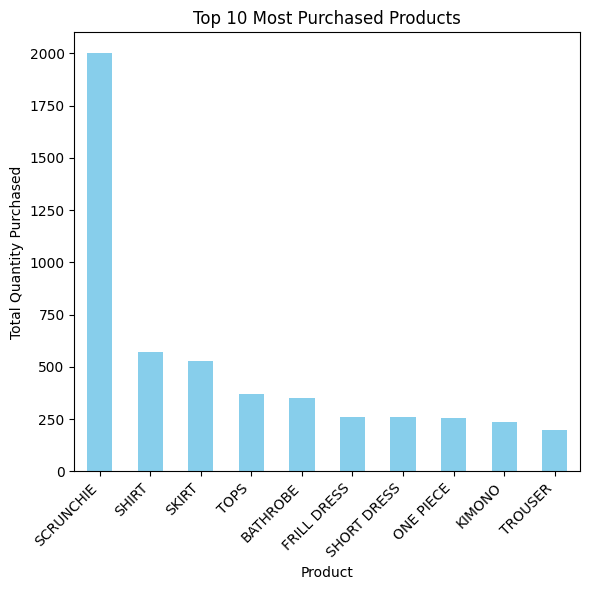

In [ ]:
import matplotlib.pyplot as plt

# Plotting the most purchased products
plt.figure(figsize=(6, 6))
product_quantities.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Purchase Pareto Chart

<ipython-input-10-a24ff1bda8f3>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(monthly_purchase_amounts.index, rotation=45, ha='right')


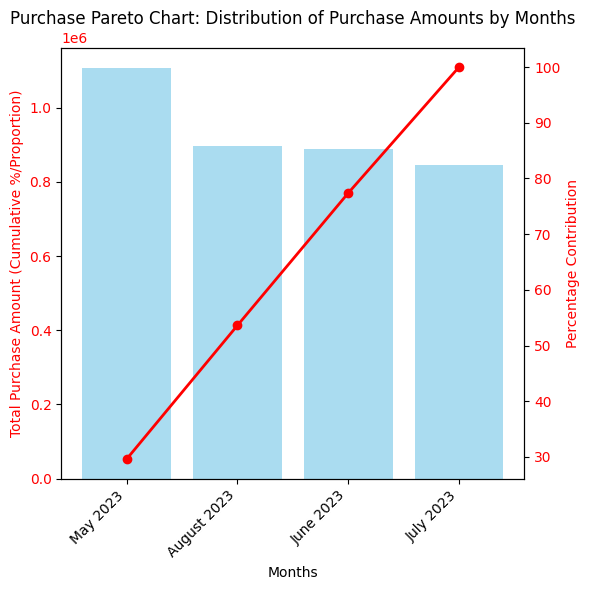

In [ ]:
# Extract month from the 'DATE' column
df['Month'] = df['DATE'].dt.month

# Calculate total purchase amounts for each month
monthly_purchase_amounts = df.groupby(df['DATE'].dt.strftime('%B %Y'))['TOTAL'].sum().sort_values(ascending=False)

# Calculate cumulative sum of purchase amounts
cumulative_purchase_amounts = monthly_purchase_amounts.cumsum()

# Calculate the percentage of total purchase amounts
total_purchase = cumulative_purchase_amounts.iloc[-1]
percentage_contribution = (cumulative_purchase_amounts / total_purchase) * 100

# Plotting the Purchase Pareto Chart
fig, ax1 = plt.subplots(figsize=(6, 6))

ax1.bar(monthly_purchase_amounts.index, monthly_purchase_amounts, color='skyblue', alpha=0.7)
ax1.set_xlabel('Months')
ax1.set_ylabel('Total Purchase Amount (Cumulative %/Proportion)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticklabels(monthly_purchase_amounts.index, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(monthly_purchase_amounts.index, percentage_contribution, color='red', marker='o', linestyle='-', linewidth=2.0)
ax2.set_ylabel('Percentage Contribution', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Purchase Pareto Chart: Distribution of Purchase Amounts by Months')
plt.tight_layout()
plt.show()


### Gender and size analysis

In [ ]:
# Calculate total quantities bought for each gender and size
gender_analysis = df.groupby('GENDER')['PIECES'].sum()
size_analysis = df.groupby('SIZE')['PIECES'].sum()

# Display the analysis
print("Total Quantities Bought by Gender:")
print(gender_analysis)

print("\nTotal Quantities Bought by Size:")
print(size_analysis)


Total Quantities Bought by Gender:
GENDER
F    5045
M     870
Name: PIECES, dtype: int64

Total Quantities Bought by Size:
SIZE
FREE SIZE    2440
L             885
M             795
S             800
XL            760
XXL           235
Name: PIECES, dtype: int64


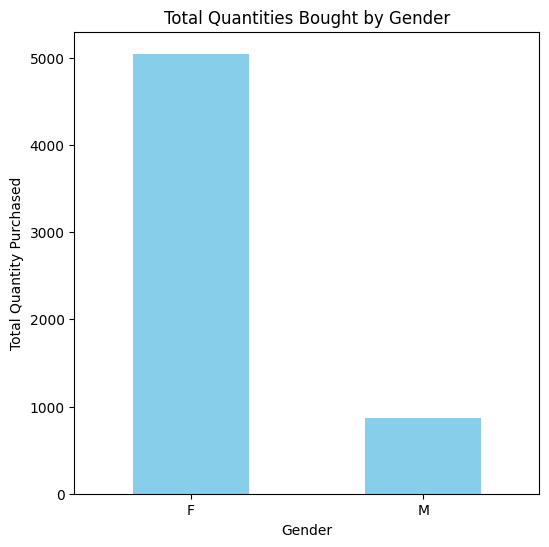

In [ ]:
# Plotting total quantities bought by gender
plt.figure(figsize=(6, 6))
gender_analysis.plot(kind='bar', color='skyblue')
plt.title('Total Quantities Bought by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=0)
plt.show()


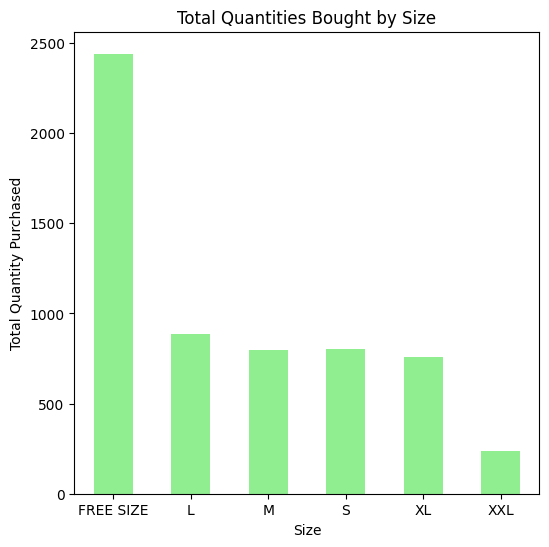

In [ ]:
# Plotting total quantities bought by size
plt.figure(figsize=(6, 6))
size_analysis.plot(kind='bar', color='lightgreen')
plt.title('Total Quantities Bought by Size')
plt.xlabel('Size')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=0)
plt.show()

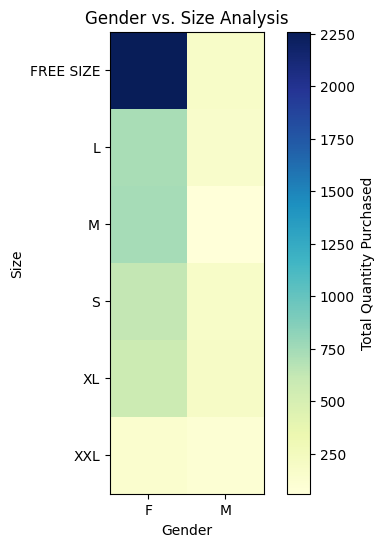

In [ ]:
# Create a pivot table to analyze quantities bought for different sizes based on gender
gender_size_analysis = df.pivot_table(index='SIZE', columns='GENDER', values='PIECES', aggfunc='sum')

# Plotting a heatmap for Gender vs. Size analysis
plt.figure(figsize=(6, 6))
plt.imshow(gender_size_analysis, cmap='YlGnBu', interpolation='nearest')
plt.title('Gender vs. Size Analysis')
plt.xlabel('Gender')
plt.ylabel('Size')
plt.colorbar(label='Total Quantity Purchased')
plt.xticks(range(len(gender_size_analysis.columns)), gender_size_analysis.columns)
plt.yticks(range(len(gender_size_analysis.index)), gender_size_analysis.index)
plt.show()


### Price distribution analysis

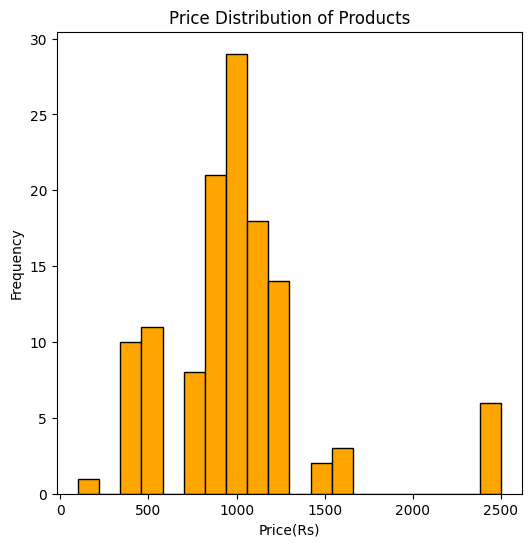

In [ ]:
# Plotting the distribution of prices
plt.figure(figsize=(6, 6))
plt.hist(df['RATE'], bins=20, color='orange', edgecolor='black')
plt.title('Price Distribution of Products')
plt.xlabel('Price(Rs)')
plt.ylabel('Frequency')
plt.show()


### Time Series Analysis (monthly purchase trends)
Time Series Analysis focuses on illustrating the trend of total purchase amounts over time, providing insights into overall purchase patterns and trends across months or time intervals.

Pareto Chart emphasizes the distribution of purchase amounts across different categories (in this case, months), highlighting the cumulative contribution of each category to the total purchases. It's often used to identify the most significant contributors to the total.

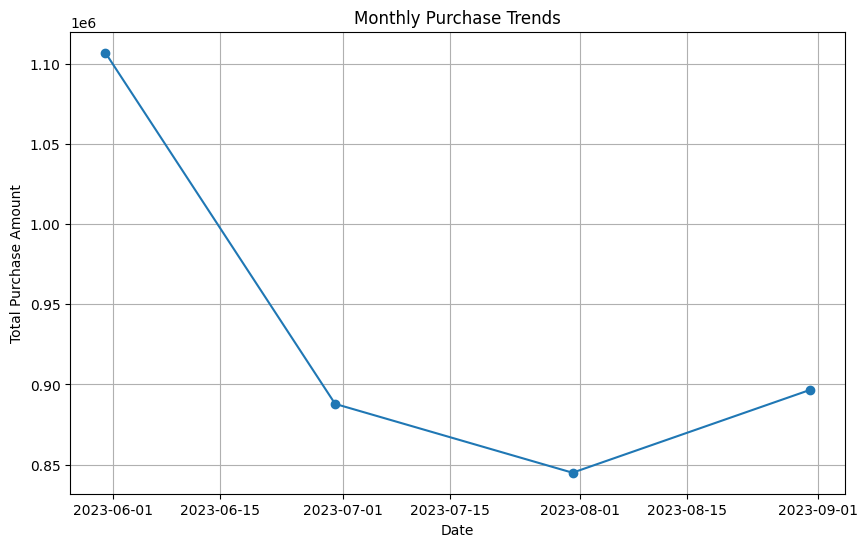

In [ ]:
# Set 'DATE' as the index (if not already set)
df.set_index('DATE', inplace=True)

# Resample data by month and sum total purchases
monthly_purchases = df.resample('M')['TOTAL'].sum()

# Plotting monthly purchase trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_purchases.index, monthly_purchases.values, marker='o', linestyle='-')
plt.title('Monthly Purchase Trends')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.show()

### Customer segmentation

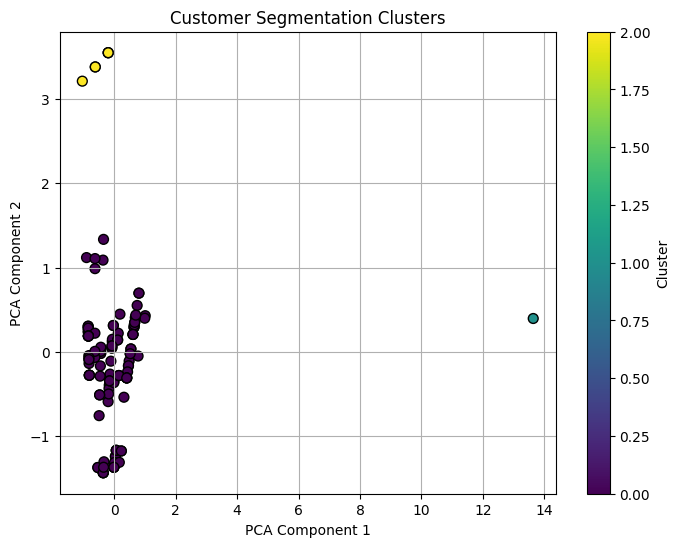

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction to visualize clusters in 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add PCA components to DataFrame
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Plotting the clusters in 2D using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


### sales forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


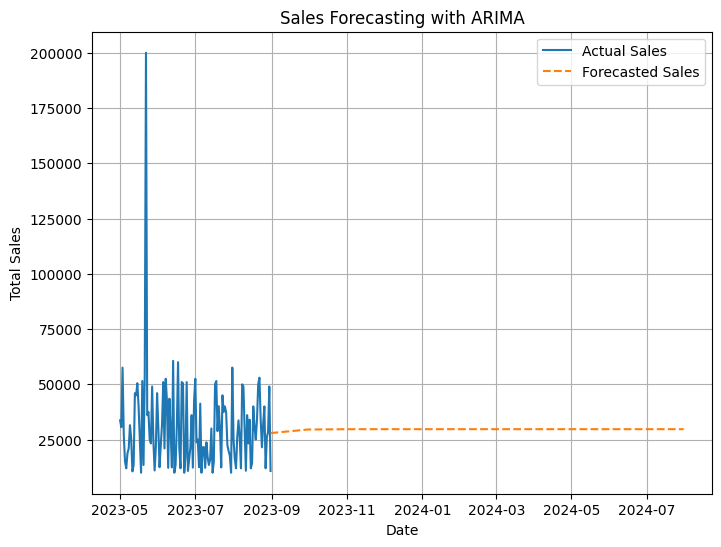

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'DATE' is set as the index and 'TOTAL' represents the total sales
# Check if 'DATE' is set as the index
# df = df.set_index('DATE')

# Fit ARIMA model
model = ARIMA(df['TOTAL'], order=(1, 1, 1))  # Define the ARIMA order (p, d, q)
model_fit = model.fit()

# Forecast future sales (change the steps parameter for the number of future periods)
forecast_steps = 12  # Change this value for the number of future periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plotting the forecasted sales
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['TOTAL'], label='Actual Sales')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()